In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import sklearn.externals
import joblib

In [26]:
df = pd.read_csv("./data/houses.csv")
del df["Unnamed: 0"]
del df["Location"]
del df["Property type"]
del df["Property subtype"]
del df["Type of sale"]
del df["Kitchen"]
del df["Furnished"]
del df["Open fireplace"]
del df["Terrace"]
del df["Terrace orientation"]
del df["Garden"]
del df["Garden orientation"]
del df["Pool"]
del df["Condition"]

df.head(10)

,Price,Number of bedrooms,Living area,Surface area land,Number of facades
0,296607.0,3.0,130.0,239.0,3
1,560000.0,4.0,NaN,626.0,3
2,299000.0,5.0,200.0,1150.0,NaN
3,300000.0,0.0,270.0,498.0,3
4,195000.0,3.0,135.0,165.0,2
5,175000.0,3.0,128.0,260.0,2
6,415000.0,3.0,207.0,534.0,3
7,405000.0,3.0,207.0,382.0,2
8,415000.0,3.0,207.0,532.0,3
9,415000.0,3.0,194.0,457.0,2


In [27]:
df=df.replace('Unknown', np.NaN, regex=True)

In [239]:
df.head()

,Price,Number of bedrooms,Living area,Surface area land,Number of facades
0,296607.0,3.0,130.0,239.0,3
1,560000.0,4.0,NaN,626.0,3
2,299000.0,5.0,200.0,1150.0,NaN
3,300000.0,0.0,270.0,498.0,3
4,195000.0,3.0,135.0,165.0,2


In [206]:
df.shape

(10082, 6)

In [5]:
print(df.isnull().sum())

Price                  124
Number of bedrooms     112
Living area           2332
Surface area land      112
Number of facades     2307
dtype: int64


In [208]:
df.columns

Index(['index', 'Price', 'Number of bedrooms', 'Living area',
       'Surface area land', 'Number of facades'],
      dtype='object')

In [28]:
#df=df.dropna(subset=["Price","Number of bedrooms","Living area","Number of facades", "Surface area land"])
df = df.dropna(axis=0, how='any', thresh=None, subset=["Price","Number of bedrooms","Living area","Number of facades", "Surface area land"], inplace=False)

df.shape

(6323, 5)

In [29]:
# generate regression dataset

#X=df.drop('Price',axis=1).to_numpy()
#X= df.iloc[:, [5,6,14,15]].values
#y=df['Price'].to_numpy

featurs=["Number of bedrooms","Living area","Number of facades", "Surface area land"]
X= df[featurs]
y=df['Price']
#print(X)
#print(y)

In [213]:
print(X.shape)
print(y.shape)

(6323, 4)
(6323,)


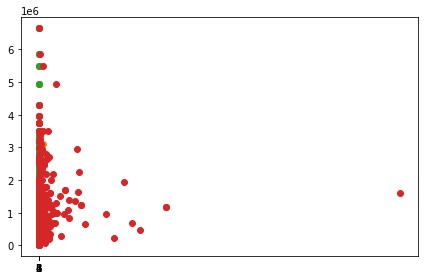

In [214]:
import matplotlib.pyplot as plt
plt.scatter(df["Number of bedrooms"], y)
plt.scatter(df["Living area"], y)
plt.scatter(df["Number of facades"], y)
plt.scatter(df["Surface area land"], y)

plt.tight_layout()
#plt.show()

In [30]:
correlation= df.corr()
correlation

,Price,Number of bedrooms,Living area,Surface area land
Price,1.000000,0.392449,0.570532,0.158391
Number of bedrooms,0.392449,1.000000,0.412824,0.072894
Living area,0.570532,0.412824,1.000000,0.134033
Surface area land,0.158391,0.072894,0.134033,1.000000


In [31]:
# split into train and test sets

from sklearn.model_selection import train_test_split
from sklearn import datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (5058, 4) (5058,)
Test (1265, 4) (1265,)


In [33]:
# Load and fit the model
from sklearn.linear_model import LinearRegression

regressor= LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
regressor.score(X_train, y_train)

0.3907144453905257

In [35]:
regressor.score(X_test, y_test)

0.2956051548818358

In [36]:
#Test your model

price_predict= regressor.predict(X_test)
price_predict

array([372911.35571806, 468808.02692676, 679084.89082624, ...,
       345672.63012018, 476417.10250819, 391085.0567743 ])

In [37]:
### Save our model, This will generate .pkl file in your currentl dircetroy, your model is ready to use.
joblib.dump(regressor,"house_price_prediction.pkl")

['house_price_prediction.pkl']